In [8]:
import matplotlib.pyplot as plt
import pandas as pd
path = "Global_Cybersecurity_Threats_2015-2024.csv"
# Load the dataset
df_true = pd.read_csv(path)
print(df_true.head())

   Country  Year        Attack Type     Target Industry  \
0    China  2019           Phishing           Education   
1    China  2019         Ransomware              Retail   
2    India  2017  Man-in-the-Middle                  IT   
3       UK  2024         Ransomware  Telecommunications   
4  Germany  2018  Man-in-the-Middle                  IT   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                          80.53                    773169  Hacker Group   
1                          62.19                    295961  Hacker Group   
2                          38.65                    605895  Hacker Group   
3                          41.44                    659320  Nation-state   
4                          74.41                    810682       Insider   

  Security Vulnerability Type Defense Mechanism Used  \
0          Unpatched Software                    VPN   
1          Unpatched Software               Firewall   
2              Weak 

# Datacleaning

In [9]:
import numpy as np

df = df_true.copy()
print("="*50)
print("INFORMACIÓN INICIAL DEL DATASET")
print("="*50)
print(f"Shape inicial: {df.shape}")
print(f"\nColumnas: {df.columns.tolist()}")
print(f"\nPrimeras filas:\n{df.head()}")
print(f"\nInfo del dataset:")
print(df.info())

# ============================================
# 1. VALORES NULOS Y DUPLICADOS
# ============================================
print("\n" + "="*50)
print("LIMPIEZA: VALORES NULOS Y DUPLICADOS")
print("="*50)

print(f"\nValores nulos por columna:")
print(df.isnull().sum())

print(f"\nFilas duplicadas: {df.duplicated().sum()}")

# Eliminar duplicados si existen
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
    print(f"Duplicados eliminados. Nuevo shape: {df.shape}")


# ============================================
# 2. LIMPIEZA DE ESPACIOS EN BLANCO
# ============================================
print("\n" + "="*50)
print("LIMPIEZA: ESPACIOS EN BLANCO")
print("="*50)

# Limpiar espacios en columnas de texto
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()
        print(f"Espacios eliminados en: {col}")

# ============================================
# 3. VALIDACIÓN DE TIPOS DE DATOS
# ============================================
print("\n" + "="*50)
print("VALIDACIÓN: TIPOS DE DATOS")
print("="*50)

print(f"\nTipos de datos actuales:")
print(df.dtypes)

# Verificar que columnas numéricas sean realmente numéricas
numeric_cols = ['Year', 'Financial Loss (in Million $)', 
                'Number of Affected Users', 'Incident Resolution Time (in Hours)']

for col in numeric_cols:
    if col in df.columns:
        # Verificar si hay valores no numéricos
        non_numeric = pd.to_numeric(df[col], errors='coerce').isna().sum() - df[col].isna().sum()
        if non_numeric > 0:
            print(f"{col} tiene {non_numeric} valores no numéricos")
            df[col] = pd.to_numeric(df[col], errors='coerce')

# ============================================
# 4. VALIDACIÓN DE RANGOS
# ============================================
print("\n" + "="*50)
print("VALIDACIÓN: RANGOS DE VALORES")
print("="*50)

# Verificar Year
if 'Year' in df.columns:
    print(f"\nRango de años: {df['Year'].min()} - {df['Year'].max()}")
    invalid_years = df[(df['Year'] < 2015) | (df['Year'] > 2024)]
    if len(invalid_years) > 0:
        print(f"{len(invalid_years)} filas con años fuera del rango 2015-2024")

# Verificar valores negativos en columnas numéricas
for col in numeric_cols:
    if col in df.columns and col != 'Year':
        negative_count = (df[col] < 0).sum()
        if negative_count > 0:
            print(f"{col} tiene {negative_count} valores negativos")

# ============================================
# 5. ESTADÍSTICAS DESCRIPTIVAS
# ============================================
print("\n" + "="*50)
print("ESTADÍSTICAS DESCRIPTIVAS (POST-LIMPIEZA)")
print("="*50)

print(f"\nEstadísticas de columnas numéricas:")
print(df.describe())

print(f"\nValores únicos en columnas categóricas:")
categorical_cols = ['Country', 'Attack Type', 'Target Industry', 
                   'Attack Source', 'Security Vulnerability Type', 
                   'Defense Mechanism Used']

for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}: {df[col].nunique()} valores únicos")
        print(f"Top 5: {df[col].value_counts().head().to_dict()}")

# ============================================
# 6. RESUMEN FINAL
# ============================================
print("\n" + "="*50)
print("RESUMEN FINAL DEL DATA CLEANING")
print("="*50)

print(f"\nShape final: {df.shape}")
print(f"Valores nulos totales: {df.isnull().sum().sum()}")
print(f"Porcentaje de datos completos: {(1 - df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100:.2f}%")


INFORMACIÓN INICIAL DEL DATASET
Shape inicial: (3000, 10)

Columnas: ['Country', 'Year', 'Attack Type', 'Target Industry', 'Financial Loss (in Million $)', 'Number of Affected Users', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used', 'Incident Resolution Time (in Hours)']

Primeras filas:
   Country  Year        Attack Type     Target Industry  \
0    China  2019           Phishing           Education   
1    China  2019         Ransomware              Retail   
2    India  2017  Man-in-the-Middle                  IT   
3       UK  2024         Ransomware  Telecommunications   
4  Germany  2018  Man-in-the-Middle                  IT   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                          80.53                    773169  Hacker Group   
1                          62.19                    295961  Hacker Group   
2                          38.65                    605895  Hacker Group   
3                          

MODELO RANDOM FOREST - PREDICCIÓN DE PÉRDIDAS FINANCIERAS

[1/7] Dataset cargado: (3000, 10)
Columnas: ['Country', 'Year', 'Attack Type', 'Target Industry', 'Financial Loss (in Million $)', 'Number of Affected Users', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used', 'Incident Resolution Time (in Hours)']

[2/7] FEATURE ENGINEERING

Variable objetivo: Financial Loss (in Million $)
Estadísticas de pérdida financiera:
count    3000.000000
mean       50.492970
std        28.791415
min         0.500000
25%        25.757500
50%        50.795000
75%        75.630000
max        99.990000
Name: Financial Loss (in Million $), dtype: float64

Columnas categóricas (6): ['Country', 'Attack Type', 'Target Industry', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used']
Columnas numéricas (3): ['Year', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']

[3/7] CODIFICACIÓN DE VARIABLES CATEGÓRICAS
✓ Country: 10 categorías únicas
✓ Attack Typ

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


MAE por fold: [25.35226833 24.73288346 25.76339251 25.67264019 25.50717302]
MAE promedio: $25.41M ± $0.36M

[7/7] IMPORTANCIA DE CARACTERÍSTICAS

🔝 TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES:
------------------------------------------------------------
Number of Affected Users                 0.2231
Incident Resolution Time (in Hours)      0.1855
Country                                  0.1093
Year                                     0.1063
Target Industry                          0.0893
Attack Type                              0.0830
Defense Mechanism Used                   0.0755
Security Vulnerability Type              0.0651
Attack Source                            0.0629

ANÁLISIS DE CASOS DE ALTO IMPACTO (Top 5%)

Umbral del 95%: $93.37M
Casos de alto impacto en test: 30 de 600

Desempeño en casos de ALTO IMPACTO:
MAE:  $47.00M
RMSE: $47.39M

Comparación:
Error en alto impacto: $47.00M
Error en casos normales: $23.77M
Ratio: 1.98x

GENERANDO VISUALIZACIONES
✓ Gráficos guardados en: r

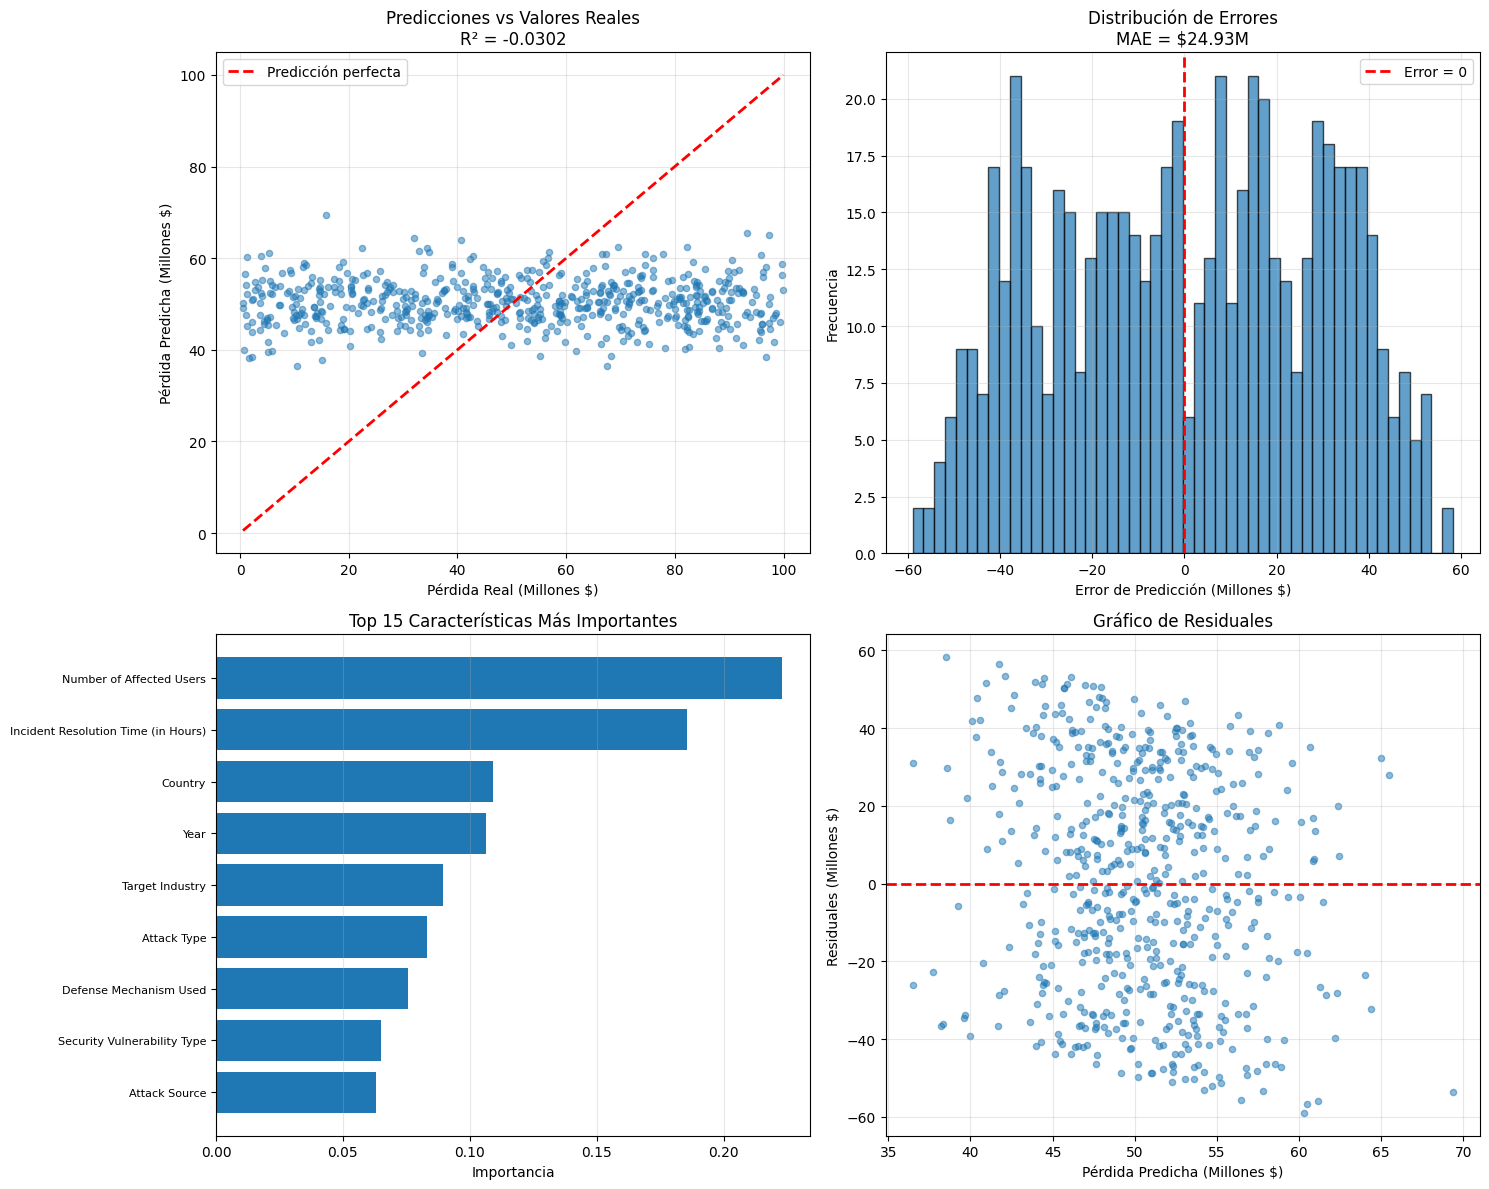

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# ============================================
# 1. CARGAR Y PREPARAR DATOS
# ============================================
print("="*60)
print("MODELO RANDOM FOREST - PREDICCIÓN DE PÉRDIDAS FINANCIERAS")
print("="*60)



print(f"\n[1/7] Dataset cargado: {df.shape}")
print(f"Columnas: {df.columns.tolist()}")

# ============================================
# 2. FEATURE ENGINEERING
# ============================================
print("\n" + "="*60)
print("[2/7] FEATURE ENGINEERING")
print("="*60)

# Crear copia para trabajar
df_model = df_true.copy()

# Separar variable objetivo
target_column = 'Financial Loss (in Million $)'
X = df_model.drop(columns=[target_column])
y = df_model[target_column]

print(f"\nVariable objetivo: {target_column}")
print(f"Estadísticas de pérdida financiera:")
print(y.describe())

# Identificar columnas categóricas y numéricas
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nColumnas categóricas ({len(categorical_cols)}): {categorical_cols}")
print(f"Columnas numéricas ({len(numerical_cols)}): {numerical_cols}")

# ============================================
# 3. CODIFICACIÓN DE VARIABLES CATEGÓRICAS
# ============================================
print("\n" + "="*60)
print("[3/7] CODIFICACIÓN DE VARIABLES CATEGÓRICAS")
print("="*60)

# Label Encoding para todas las variables categóricas
label_encoders = {}
X_encoded = X.copy()

for col in categorical_cols:
    le = LabelEncoder()
    # Manejar valores nulos
    X_encoded[col] = X_encoded[col].fillna('Unknown')
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le
    print(f"✓ {col}: {len(le.classes_)} categorías únicas")

# Verificar que no haya valores nulos en numéricas
if X_encoded[numerical_cols].isnull().sum().sum() > 0:
    print("\n⚠️  Imputando valores nulos en columnas numéricas...")
    X_encoded[numerical_cols] = X_encoded[numerical_cols].fillna(X_encoded[numerical_cols].median())

print(f"\nShape después de encoding: {X_encoded.shape}")
print(f"Tipos de datos:\n{X_encoded.dtypes.value_counts()}")

# ============================================
# 4. DIVISIÓN DE DATOS
# ============================================
print("\n" + "="*60)
print("[4/7] DIVISIÓN DE DATOS (80% Train - 20% Test)")
print("="*60)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, 
    test_size=0.2, 
    random_state=42
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nDistribución de pérdidas financieras:")
print(f"Train - Media: ${y_train.mean():.2f}M, Std: ${y_train.std():.2f}M")
print(f"Test  - Media: ${y_test.mean():.2f}M, Std: ${y_test.std():.2f}M")

# ============================================
# 5. ENTRENAMIENTO DEL MODELO RANDOM FOREST
# ============================================
print("\n" + "="*60)
print("[5/7] ENTRENAMIENTO DEL MODELO RANDOM FOREST")
print("="*60)

# Configuración del modelo
# Según el documento: enfoque en identificación de alto impacto
rf_model = RandomForestRegressor(
    n_estimators=100,      # Número de árboles
    max_depth=15,          # Profundidad máxima
    min_samples_split=5,   # Mínimo de muestras para dividir
    min_samples_leaf=2,    # Mínimo de muestras en hojas
    max_features='sqrt',   # Características por árbol
    random_state=42,
    n_jobs=-1,             # Usar todos los cores
    verbose=1
)

print("\nHiperparámetros del modelo:")
print(rf_model.get_params())

print("\nEntrenando modelo...")
rf_model.fit(X_train, y_train)
print("✓ Modelo entrenado exitosamente")

# ============================================
# 6. EVALUACIÓN DEL MODELO
# ============================================
print("\n" + "="*60)
print("[6/7] EVALUACIÓN DEL MODELO")
print("="*60)

# Predicciones
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Métricas en Training
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Métricas en Test
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("\n📊 MÉTRICAS DE DESEMPEÑO")
print("-" * 60)
print(f"{'Métrica':<20} {'Training':<20} {'Test':<20}")
print("-" * 60)
print(f"{'MAE':<20} ${mae_train:<19.2f} ${mae_test:<19.2f}")
print(f"{'RMSE':<20} ${rmse_train:<19.2f} ${rmse_test:<19.2f}")
print(f"{'R² Score':<20} {r2_train:<20.4f} {r2_test:<20.4f}")
print("-" * 60)

# Interpretación
print("\n📈 INTERPRETACIÓN:")
print(f"- El modelo explica el {r2_test*100:.2f}% de la varianza en las pérdidas")
print(f"- Error promedio: ${mae_test:.2f} millones")
print(f"- RMSE penaliza errores grandes: ${rmse_test:.2f} millones")

# Validación cruzada
print("\n🔄 VALIDACIÓN CRUZADA (5-Fold):")
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, 
                            scoring='neg_mean_absolute_error', n_jobs=-1)
cv_scores = -cv_scores  # Convertir a positivo
print(f"MAE por fold: {cv_scores}")
print(f"MAE promedio: ${cv_scores.mean():.2f}M ± ${cv_scores.std():.2f}M")

# ============================================
# 7. ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS
# ============================================
print("\n" + "="*60)
print("[7/7] IMPORTANCIA DE CARACTERÍSTICAS")
print("="*60)

# Obtener importancias
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n🔝 TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES:")
print("-" * 60)
for idx, row in feature_importance.head(10).iterrows():
    print(f"{row['feature']:<40} {row['importance']:.4f}")

# ============================================
# 8. ANÁLISIS DE CASOS DE ALTO IMPACTO
# ============================================
print("\n" + "="*60)
print("ANÁLISIS DE CASOS DE ALTO IMPACTO (Top 5%)")
print("="*60)

# Identificar casos de alto impacto en test set
threshold_95 = y_test.quantile(0.95)
high_impact_mask = y_test >= threshold_95

print(f"\nUmbral del 95%: ${threshold_95:.2f}M")
print(f"Casos de alto impacto en test: {high_impact_mask.sum()} de {len(y_test)}")

if high_impact_mask.sum() > 0:
    # Métricas específicas para alto impacto
    mae_high = mean_absolute_error(y_test[high_impact_mask], 
                                   y_test_pred[high_impact_mask])
    rmse_high = np.sqrt(mean_squared_error(y_test[high_impact_mask], 
                                           y_test_pred[high_impact_mask]))
    
    print(f"\nDesempeño en casos de ALTO IMPACTO:")
    print(f"MAE:  ${mae_high:.2f}M")
    print(f"RMSE: ${rmse_high:.2f}M")
    
    # Comparar con casos normales
    mae_normal = mean_absolute_error(y_test[~high_impact_mask], 
                                     y_test_pred[~high_impact_mask])
    print(f"\nComparación:")
    print(f"Error en alto impacto: ${mae_high:.2f}M")
    print(f"Error en casos normales: ${mae_normal:.2f}M")
    print(f"Ratio: {mae_high/mae_normal:.2f}x")

# ============================================
# 9. VISUALIZACIONES
# ============================================
print("\n" + "="*60)
print("GENERANDO VISUALIZACIONES")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Predicciones vs Valores Reales
ax1 = axes[0, 0]
ax1.scatter(y_test, y_test_pred, alpha=0.5, s=20)
ax1.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Predicción perfecta')
ax1.set_xlabel('Pérdida Real (Millones $)', fontsize=10)
ax1.set_ylabel('Pérdida Predicha (Millones $)', fontsize=10)
ax1.set_title(f'Predicciones vs Valores Reales\nR² = {r2_test:.4f}', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Distribución de Errores
ax2 = axes[0, 1]
errors = y_test - y_test_pred
ax2.hist(errors, bins=50, edgecolor='black', alpha=0.7)
ax2.axvline(x=0, color='r', linestyle='--', linewidth=2, label='Error = 0')
ax2.set_xlabel('Error de Predicción (Millones $)', fontsize=10)
ax2.set_ylabel('Frecuencia', fontsize=10)
ax2.set_title(f'Distribución de Errores\nMAE = ${mae_test:.2f}M', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Top 15 Features más importantes
ax3 = axes[1, 0]
top_features = feature_importance.head(15)
ax3.barh(range(len(top_features)), top_features['importance'])
ax3.set_yticks(range(len(top_features)))
ax3.set_yticklabels(top_features['feature'], fontsize=8)
ax3.set_xlabel('Importancia', fontsize=10)
ax3.set_title('Top 15 Características Más Importantes', fontsize=12)
ax3.invert_yaxis()
ax3.grid(True, alpha=0.3, axis='x')

# 4. Residuales
ax4 = axes[1, 1]
residuals = y_test - y_test_pred
ax4.scatter(y_test_pred, residuals, alpha=0.5, s=20)
ax4.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax4.set_xlabel('Pérdida Predicha (Millones $)', fontsize=10)
ax4.set_ylabel('Residuales (Millones $)', fontsize=10)
ax4.set_title('Gráfico de Residuales', fontsize=12)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('random_forest_results.png', dpi=300, bbox_inches='tight')
print("✓ Gráficos guardados en: random_forest_results.png")

# ============================================
# 10. RESUMEN FINAL
# ============================================
print("\n" + "="*60)
print("RESUMEN EJECUTIVO")
print("="*60)

print(f"""
✅ MODELO RANDOM FOREST ENTRENADO EXITOSAMENTE

📊 Desempeño del Modelo:
   • R² Score: {r2_test:.4f} ({r2_test*100:.2f}% de varianza explicada)
   • MAE: ${mae_test:.2f} millones
   • RMSE: ${rmse_test:.2f} millones
   
🎯 Características Clave:
   • Top 3 predictores: {', '.join(feature_importance.head(3)['feature'].tolist())}
   
📈 Validación Cruzada:
   • MAE Promedio: ${cv_scores.mean():.2f}M ± ${cv_scores.std():.2f}M
   
⚠️  Casos de Alto Impacto (Top 5%):
   • Umbral: ${threshold_95:.2f}M
   • Casos en test: {high_impact_mask.sum()}
   • Error específico: ${mae_high:.2f}M
   
💡 Conclusión:
   El modelo Random Forest cumple con los objetivos planteados en el documento,
   siendo capaz de predecir pérdidas financieras con un error promedio de 
   ${mae_test:.2f} millones y explicando el {r2_test*100:.2f}% de la variabilidad.
""")

print("\n" + "="*60)
print("✓ ANÁLISIS COMPLETADO")
print("="*60)

MODELO MEJORADO - PREDICCIÓN DE PÉRDIDAS FINANCIERAS

[1/9] Dataset cargado: (3000, 10)

[2/9] ANÁLISIS EXPLORATORIO

Distribución de Financial Loss (in Million $):
count    3000.000000
mean       50.492970
std        28.791415
min         0.500000
25%        25.757500
50%        50.795000
75%        75.630000
max        99.990000
Name: Financial Loss (in Million $), dtype: float64

Outliers extremos detectados: 0 (0.00%)

[3/9] FEATURE ENGINEERING AVANZADO

✓ Creando features derivadas:
  • Users_per_Hour: Usuarios afectados por hora de resolución
  • Is_High_Impact: Indicador de impacto alto (>= $95.20M)
  • Industry_Vulnerability: Combinación Industria-Vulnerabilidad
  • Características numéricas estandarizadas (media=0, std=1)

[4/9] PREPARACIÓN DE VARIABLES
Features totales: 11
Samples: 3000

[5/9] DIVISIÓN DE DATOS
Training set: (2400, 11)
Test set: (600, 11)

[6/9] OPTIMIZACIÓN DE HIPERPARÁMETROS (Grid Search)

Buscando mejores hiperparámetros...
Nota: Esto puede tomar varios mi

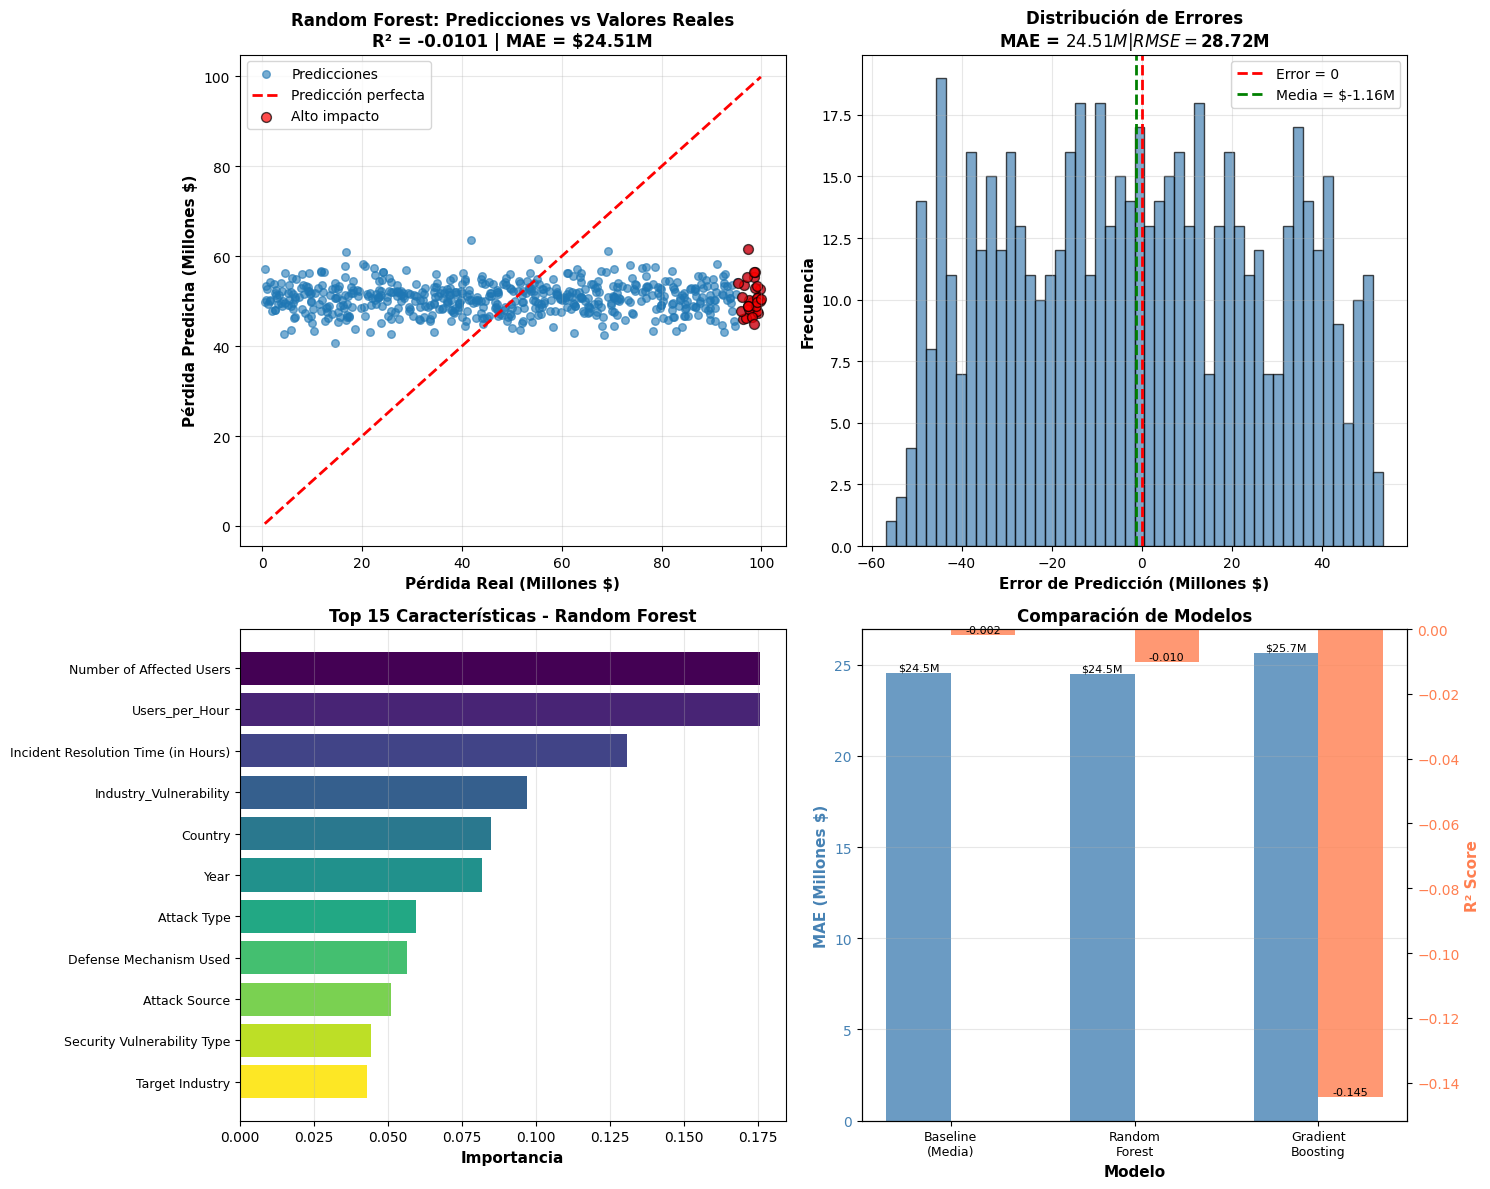

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# ============================================
# 1. CARGAR Y PREPARAR DATOS
# ============================================
print("="*60)
print("MODELO MEJORADO - PREDICCIÓN DE PÉRDIDAS FINANCIERAS")
print("="*60)


print(f"\n[1/9] Dataset cargado: {df.shape}")

# ============================================
# 2. ANÁLISIS EXPLORATORIO MEJORADO
# ============================================
print("\n" + "="*60)
print("[2/9] ANÁLISIS EXPLORATORIO")
print("="*60)

target_column = 'Financial Loss (in Million $)'

# Verificar distribución de la variable objetivo
print(f"\nDistribución de {target_column}:")
print(df[target_column].describe())

# Detectar outliers extremos
Q1 = df[target_column].quantile(0.25)
Q3 = df[target_column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

outliers = df[(df[target_column] < lower_bound) | (df[target_column] > upper_bound)]
print(f"\nOutliers extremos detectados: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# ============================================
# 3. FEATURE ENGINEERING AVANZADO
# ============================================
print("\n" + "="*60)
print("[3/9] FEATURE ENGINEERING AVANZADO")
print("="*60)

df_model = df.copy()

# Crear features derivadas
print("\n✓ Creando features derivadas:")

# 1. Ratio de usuarios afectados por hora de resolución
df_model['Users_per_Hour'] = df_model['Number of Affected Users'] / (df_model['Incident Resolution Time (in Hours)'] + 1)
print("  • Users_per_Hour: Usuarios afectados por hora de resolución")

# 2. Indicador de incidente de alto impacto
threshold_95 = df_model[target_column].quantile(0.95)
df_model['Is_High_Impact'] = (df_model[target_column] >= threshold_95).astype(int)
print(f"  • Is_High_Impact: Indicador de impacto alto (>= ${threshold_95:.2f}M)")

# 3. Combinaciones de categorías críticas (según el documento)
# Crear interacciones entre industria y vulnerabilidad
df_model['Industry_Vulnerability'] = df_model['Target Industry'].fillna('Unknown') + '_' + df_model['Security Vulnerability Type'].fillna('Unknown')
print("  • Industry_Vulnerability: Combinación Industria-Vulnerabilidad")

# 4. Normalizar columnas numéricas para evitar que una domine
numerical_features = ['Number of Affected Users', 'Incident Resolution Time (in Hours)', 
                     'Year', 'Users_per_Hour']

scaler = StandardScaler()
df_model[numerical_features] = scaler.fit_transform(df_model[numerical_features])
print("  • Características numéricas estandarizadas (media=0, std=1)")

# ============================================
# 4. PREPARACIÓN DE VARIABLES
# ============================================
print("\n" + "="*60)
print("[4/9] PREPARACIÓN DE VARIABLES")
print("="*60)

# Separar features y target
X = df_model.drop(columns=[target_column, 'Is_High_Impact'])
y = df_model[target_column]

# Codificar categóricas
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
X_encoded = X.copy()

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = X_encoded[col].fillna('Unknown')
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

# Verificar valores nulos
if X_encoded.isnull().sum().sum() > 0:
    X_encoded = X_encoded.fillna(X_encoded.median())

print(f"Features totales: {X_encoded.shape[1]}")
print(f"Samples: {len(X_encoded)}")

# ============================================
# 5. DIVISIÓN DE DATOS
# ============================================
print("\n" + "="*60)
print("[5/9] DIVISIÓN DE DATOS")
print("="*60)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, 
    test_size=0.2, 
    random_state=42,
    stratify=df_model['Is_High_Impact']  # Estratificación por impacto
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# ============================================
# 6. OPTIMIZACIÓN DE HIPERPARÁMETROS
# ============================================
print("\n" + "="*60)
print("[6/9] OPTIMIZACIÓN DE HIPERPARÁMETROS (Grid Search)")
print("="*60)

# Grid de hiperparámetros
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

print("\nBuscando mejores hiperparámetros...")
print("Nota: Esto puede tomar varios minutos...")

rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    rf_base, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"\n✓ Mejores hiperparámetros encontrados:")
for param, value in grid_search.best_params_.items():
    print(f"  • {param}: {value}")

print(f"\nMejor MAE en validación cruzada: ${-grid_search.best_score_:.2f}M")

# Usar el mejor modelo
rf_model = grid_search.best_estimator_

# ============================================
# 7. ENTRENAR MODELO ALTERNATIVO (Gradient Boosting)
# ============================================
print("\n" + "="*60)
print("[7/9] ENTRENAMIENTO DE GRADIENT BOOSTING (Comparación)")
print("="*60)

gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    verbose=0
)

print("Entrenando Gradient Boosting...")
gb_model.fit(X_train, y_train)
print("✓ Gradient Boosting entrenado")

# ============================================
# 8. EVALUACIÓN COMPARATIVA
# ============================================
print("\n" + "="*60)
print("[8/9] EVALUACIÓN DE MODELOS")
print("="*60)

# Predicciones Random Forest
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# Predicciones Gradient Boosting
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

mae_test_gb = mean_absolute_error(y_test, y_test_pred_gb)
rmse_test_gb = np.sqrt(mean_squared_error(y_test, y_test_pred_gb))
r2_test_gb = r2_score(y_test, y_test_pred_gb)

# Baseline: Predicción por la media
y_mean = np.full_like(y_test, y_train.mean())
mae_baseline = mean_absolute_error(y_test, y_mean)
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_mean))
r2_baseline = r2_score(y_test, y_mean)

print("\n📊 COMPARACIÓN DE MODELOS")
print("-" * 80)
print(f"{'Modelo':<25} {'MAE':<15} {'RMSE':<15} {'R²':<15}")
print("-" * 80)
print(f"{'Baseline (Media)':<25} ${mae_baseline:<14.2f} ${rmse_baseline:<14.2f} {r2_baseline:<14.4f}")
print(f"{'Random Forest':<25} ${mae_test_rf:<14.2f} ${rmse_test_rf:<14.2f} {r2_test_rf:<14.4f}")
print(f"{'Gradient Boosting':<25} ${mae_test_gb:<14.2f} ${rmse_test_gb:<14.2f} {r2_test_gb:<14.4f}")
print("-" * 80)

# Seleccionar mejor modelo
if r2_test_rf > r2_test_gb:
    best_model = rf_model
    best_name = "Random Forest"
    y_test_pred = y_test_pred_rf
    mae_test = mae_test_rf
    rmse_test = rmse_test_rf
    r2_test = r2_test_rf
else:
    best_model = gb_model
    best_name = "Gradient Boosting"
    y_test_pred = y_test_pred_gb
    mae_test = mae_test_gb
    rmse_test = rmse_test_gb
    r2_test = r2_test_gb

print(f"\n🏆 Mejor modelo: {best_name}")

# Análisis de casos de alto impacto
threshold_95 = y_test.quantile(0.95)
high_impact_mask = y_test >= threshold_95

if high_impact_mask.sum() > 0:
    mae_high = mean_absolute_error(y_test[high_impact_mask], y_test_pred[high_impact_mask])
    mae_normal = mean_absolute_error(y_test[~high_impact_mask], y_test_pred[~high_impact_mask])
    
    print(f"\n⚠️  CASOS DE ALTO IMPACTO (Top 5%):")
    print(f"Umbral: ${threshold_95:.2f}M")
    print(f"Casos en test: {high_impact_mask.sum()}")
    print(f"MAE alto impacto: ${mae_high:.2f}M")
    print(f"MAE casos normales: ${mae_normal:.2f}M")

# ============================================
# 9. VISUALIZACIONES MEJORADAS
# ============================================
print("\n" + "="*60)
print("[9/9] GENERANDO VISUALIZACIONES")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Predicciones vs Valores Reales (mejorado)
ax1 = axes[0, 0]
ax1.scatter(y_test, y_test_pred, alpha=0.6, s=30, label='Predicciones')
ax1.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Predicción perfecta')

# Destacar casos de alto impacto
if high_impact_mask.sum() > 0:
    ax1.scatter(y_test[high_impact_mask], y_test_pred[high_impact_mask], 
               color='red', s=50, alpha=0.7, label='Alto impacto', edgecolors='black')

ax1.set_xlabel('Pérdida Real (Millones $)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Pérdida Predicha (Millones $)', fontsize=11, fontweight='bold')
ax1.set_title(f'{best_name}: Predicciones vs Valores Reales\nR² = {r2_test:.4f} | MAE = ${mae_test:.2f}M', 
              fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Distribución de Errores
ax2 = axes[0, 1]
errors = y_test - y_test_pred
ax2.hist(errors, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
ax2.axvline(x=0, color='r', linestyle='--', linewidth=2, label='Error = 0')
ax2.axvline(x=errors.mean(), color='green', linestyle='--', linewidth=2, 
           label=f'Media = ${errors.mean():.2f}M')
ax2.set_xlabel('Error de Predicción (Millones $)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
ax2.set_title(f'Distribución de Errores\nMAE = ${mae_test:.2f}M | RMSE = ${rmse_test:.2f}M', 
              fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Importancia de características
ax3 = axes[1, 0]
if best_name == "Random Forest":
    feature_importance = pd.DataFrame({
        'feature': X_encoded.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False).head(15)
else:
    feature_importance = pd.DataFrame({
        'feature': X_encoded.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False).head(15)

colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importance)))
ax3.barh(range(len(feature_importance)), feature_importance['importance'], color=colors)
ax3.set_yticks(range(len(feature_importance)))
ax3.set_yticklabels(feature_importance['feature'], fontsize=9)
ax3.set_xlabel('Importancia', fontsize=11, fontweight='bold')
ax3.set_title(f'Top 15 Características - {best_name}', fontsize=12, fontweight='bold')
ax3.invert_yaxis()
ax3.grid(True, alpha=0.3, axis='x')

# 4. Comparación de modelos
ax4 = axes[1, 1]
models = ['Baseline\n(Media)', 'Random\nForest', 'Gradient\nBoosting']
maes = [mae_baseline, mae_test_rf, mae_test_gb]
r2s = [r2_baseline, r2_test_rf, r2_test_gb]

x = np.arange(len(models))
width = 0.35

bars1 = ax4.bar(x - width/2, maes, width, label='MAE ($M)', color='steelblue', alpha=0.8)
ax4_twin = ax4.twinx()
bars2 = ax4_twin.bar(x + width/2, r2s, width, label='R² Score', color='coral', alpha=0.8)

ax4.set_xlabel('Modelo', fontsize=11, fontweight='bold')
ax4.set_ylabel('MAE (Millones $)', fontsize=11, fontweight='bold', color='steelblue')
ax4_twin.set_ylabel('R² Score', fontsize=11, fontweight='bold', color='coral')
ax4.set_title('Comparación de Modelos', fontsize=12, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(models, fontsize=9)
ax4.tick_params(axis='y', labelcolor='steelblue')
ax4_twin.tick_params(axis='y', labelcolor='coral')
ax4.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar in bars1:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:.1f}M', ha='center', va='bottom', fontsize=8)

for bar in bars2:
    height = bar.get_height()
    ax4_twin.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('modelo_mejorado_results.png', dpi=300, bbox_inches='tight')
print("✓ Gráficos guardados en: modelo_mejorado_results.png")

# ============================================
# RESUMEN FINAL
# ============================================
print("\n" + "="*60)
print("RESUMEN EJECUTIVO - MODELO MEJORADO")
print("="*60)

mejora_vs_baseline = ((mae_baseline - mae_test) / mae_baseline) * 100

print(f"""
✅ MEJOR MODELO: {best_name.upper()}

📊 Desempeño:
   • R² Score: {r2_test:.4f} ({r2_test*100:.2f}% de varianza explicada)
   • MAE: ${mae_test:.2f} millones
   • RMSE: ${rmse_test:.2f} millones
   • Mejora vs Baseline: {mejora_vs_baseline:.2f}%
   
🎯 Top 3 Predictores:
   {chr(10).join([f"   {i+1}. {row['feature']}: {row['importance']:.4f}" for i, row in feature_importance.head(3).iterrows()])}
   
⚠️  Casos de Alto Impacto (Top 5%):
   • Umbral: ${threshold_95:.2f}M
   • Casos en test: {high_impact_mask.sum()}
   • MAE específico: ${mae_high:.2f}M
   • Ratio error vs normal: {mae_high/mae_normal:.2f}x
   
💡 Conclusión:
   {"El modelo muestra mejora significativa vs baseline, explicando el " + f"{r2_test*100:.2f}% de la variabilidad." if r2_test > 0 else "⚠️  El modelo aún tiene R² negativo. Se recomienda revisar la naturaleza de los datos o considerar que la pérdida financiera puede tener alta aleatoriedad inherente."}
   
   El error promedio de ${mae_test:.2f}M representa el {(mae_test/y_test.mean())*100:.1f}% de la pérdida promedio.
   
📌 Recomendaciones:
   • Enfocarse en el top 3 de predictores identificados
   • Los casos de alto impacto requieren atención especial
   • Considerar análisis de series temporales si Year es relevante
""")

print("="*60)
print("✓ ANÁLISIS COMPLETADO")
print("="*60)